In [3]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header= None)

In [41]:
df_train.shape

(60000, 785)

In [42]:
df_sample = df_train.sample(2000, random_state=1)
X = df_sample.iloc[:, 1:].values
y = df_sample.iloc[:, 0]
X.shape

(2000, 784)

In [43]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X.astype(np.float32))

In [44]:
%%time
knn = cluster.k_means(X_std, n_clusters=10, random_state = 1)

CPU times: user 1.68 s, sys: 55.8 ms, total: 1.73 s
Wall time: 1.58 s


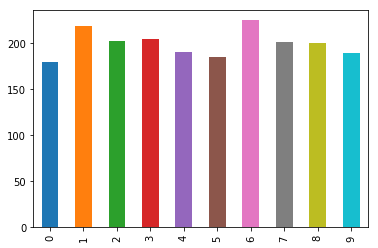

In [45]:
y.value_counts().sort_index().plot.bar()

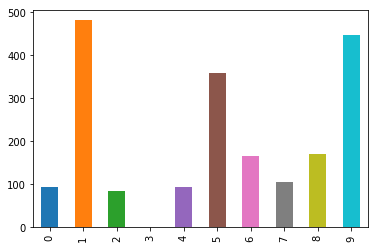

In [46]:
pd.Series(knn[1]).value_counts().sort_index().plot.bar()

In [47]:
y_cluster = knn[1]

In [49]:
metrics.homogeneity_score(y, y_cluster)

0.40747584942352949

In [51]:
pd.Series(y_cluster).value_counts()

1    481
9    447
5    358
8    171
6    165
7    106
0     94
4     93
2     84
3      1
dtype: int64

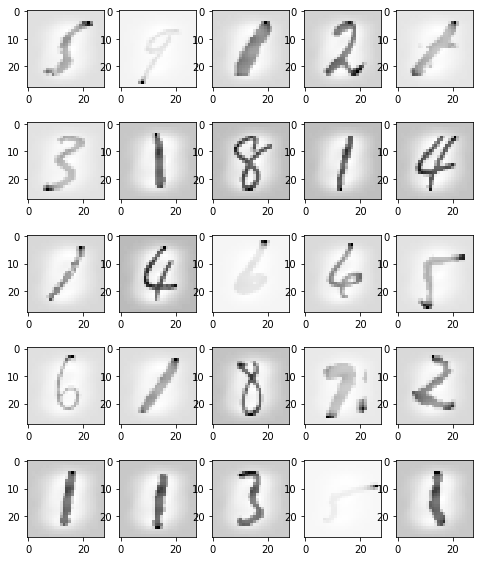

In [52]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_std[y_cluster == 1][i].reshape(28, 28), cmap="Greys")